# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [2]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 

In [3]:
#Loading test and train datasets
df2 = pd.read_csv('kc_house_data_test_features.csv', index_col=0)
df1 = pd.read_csv('kc_house_data_train.csv', index_col=0)

In [4]:
df1.shape

(17290, 21)

In [5]:
df2.shape

(4323, 20)

In [6]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
df2.columns

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17290 entries, 0 to 17289
Data columns (total 21 columns):
id               17290 non-null int64
date             17290 non-null object
price            17290 non-null float64
bedrooms         17290 non-null int64
bathrooms        17290 non-null float64
sqft_living      17290 non-null int64
sqft_lot         17290 non-null int64
floors           17290 non-null float64
waterfront       17290 non-null int64
view             17290 non-null int64
condition        17290 non-null int64
grade            17290 non-null int64
sqft_above       17290 non-null int64
sqft_basement    17290 non-null int64
yr_built         17290 non-null int64
yr_renovated     17290 non-null int64
zipcode          17290 non-null int64
lat              17290 non-null float64
long             17290 non-null float64
sqft_living15    17290 non-null int64
sqft_lot15       17290 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.9+ MB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4322
Data columns (total 20 columns):
id               4323 non-null int64
date             4323 non-null object
bedrooms         4323 non-null int64
bathrooms        4323 non-null float64
sqft_living      4323 non-null int64
sqft_lot         4323 non-null int64
floors           4323 non-null float64
waterfront       4323 non-null int64
view             4323 non-null int64
condition        4323 non-null int64
grade            4323 non-null int64
sqft_above       4323 non-null int64
sqft_basement    4323 non-null int64
yr_built         4323 non-null int64
yr_renovated     4323 non-null int64
zipcode          4323 non-null int64
lat              4323 non-null float64
long             4323 non-null float64
sqft_living15    4323 non-null int64
sqft_lot15       4323 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 709.2+ KB


In [10]:
pd.set_option('display.max_columns', None)
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [11]:
df2.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [12]:
df1.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4565501756.436553,540739.548641,3.372470,2.111943,2081.464604,15243.399884,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2874655595.362363,373318.978749,0.939346,0.770476,920.018539,42304.623788,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1000102.000000,75000.000000,0.000000,0.000000,290.000000,572.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2114700558.750000,321000.000000,3.000000,1.500000,1430.000000,5081.250000,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3903650042.500000,450000.000000,3.000000,2.250000,1920.000000,7642.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7301150051.500000,645000.000000,4.000000,2.500000,2550.000000,10725.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9900000190.000000,7700000.000000,33.000000,8.000000,13540.000000,1651359.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


In [13]:
df2.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000,4323.000000
mean,4625408959.804996,3.387231,2.322056,2183.344899,12750.177423,1.738723,0.006477,0.201249,3.248439,7.904696,1936.424474,246.920426,1985.545686,64.198705,98077.777932,47.560232,-122.209611,2031.962757,10789.035855
std,2920358721.688492,0.906016,0.782063,966.768796,40639.425496,0.586193,0.080228,0.711334,0.554978,1.167461,895.247498,408.555950,30.572267,352.271856,50.974730,0.133668,0.147649,727.968964,27415.348930
min,3600072.000000,0.000000,0.000000,290.000000,635.000000,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.185300,-122.505000,620.000000,651.000000
25%,2125734752.000000,3.000000,1.750000,1452.000000,3800.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1248.000000,0.000000,1964.000000,0.000000,98033.000000,47.487400,-122.334000,1480.000000,4000.000000
50%,3834000820.000000,3.000000,2.500000,2000.000000,6000.000000,2.000000,0.000000,0.000000,3.000000,8.000000,1690.000000,0.000000,2002.000000,0.000000,98065.000000,47.567400,-122.230000,1870.000000,6000.000000
75%,7504000830.000000,4.000000,2.500000,2730.000000,9156.000000,2.000000,0.000000,0.000000,3.000000,9.000000,2520.000000,418.500000,2009.000000,0.000000,98117.000000,47.673450,-122.115000,2460.000000,9000.000000
max,9895000040.000000,10.000000,6.500000,8020.000000,1164794.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8020.000000,2810.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.364000,6210.000000,858132.000000


In [14]:
df1.nunique(axis=0)

id               17176
date               371
price             3534
bedrooms            13
bathrooms           30
sqft_living        947
sqft_lot          8428
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         867
sqft_basement      290
yr_built           116
yr_renovated        69
zipcode             70
lat               4837
long               733
sqft_living15      714
sqft_lot15        7582
dtype: int64

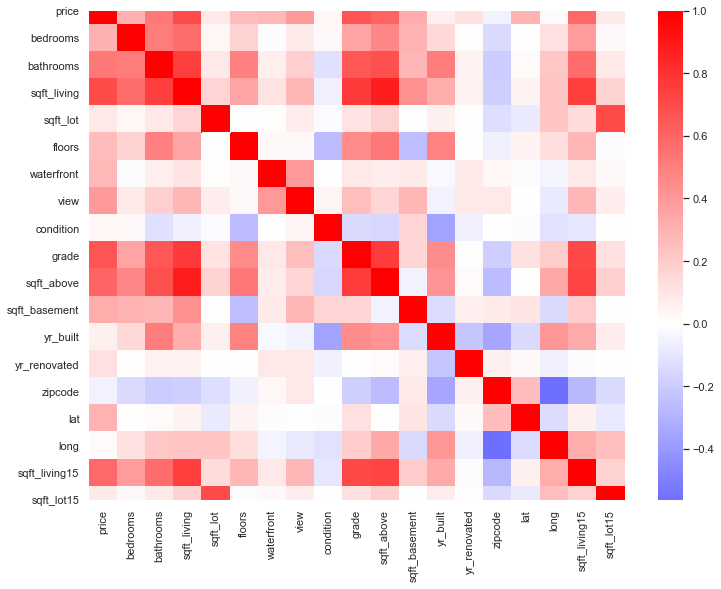

In [15]:
corr = df1.drop(columns = ['id']).corr()
sns.set(rc={'figure.figsize':(12,9)})
sns.heatmap(corr, xticklabels=corr.columns, \
            yticklabels=corr.columns, \
            annot=False, cmap='bwr', center= 0)

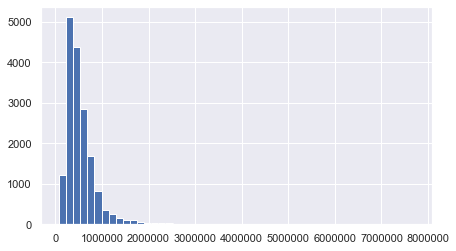

In [133]:
fig, ax = plt.subplots(figsize = (7,4))
ax.hist(df1['price'], bins = 50);

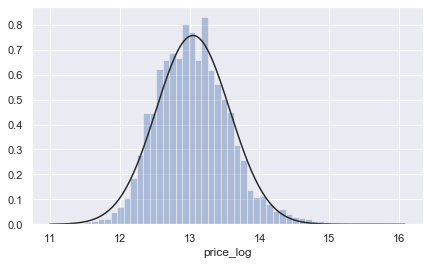

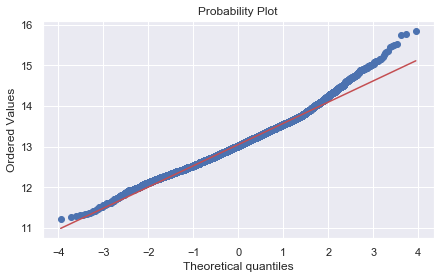

In [17]:
#transformed histogram and normal probability plot
df1['price_log'] = np.log(df1['price'])
from scipy import stats
from scipy.stats import norm
fig = plt.figure(figsize = (7,4))
sns.distplot(df1['price_log'], fit=norm,  bins=50, kde=False);
fig = plt.figure(figsize = (7,4))
res = stats.probplot(df1['price_log'], plot=plt)

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [80]:
df1['date1'] = df1['date'].apply(lambda x: (x[:8]))

df1['date1'].astype(float)
df1['date2']= pd.to_datetime(df1['date1'], format='%Y/%m/%d')



## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

**Possible new values:**
1. bathroom/bedroom --- no correlation to price
2. bathroom/ floor --- corr to price is **0.2402**
3. bathroom/ sqft-living --- corr to price is -0.2655. Does this make sense? I think not
4. Age of the house using yr-built --- corr to price is -0.05645. Not very correlated with price
5. sqft_living/sqft_above to check on the proportion of usable space --- 0.1093
6. (sqft_above + sqft_basement)/ floor to get avg sqftage per floor --- **0.4334**
7. sqft_lot - sqft/floor to get outside open space --- 0.08
8. sqft_living - sqft_above does the house have other spaces under the roof --- **0.3233**

In [125]:
# Possible value 1
df1['bath_per_bed'] = df1['bathrooms']/ df1['bedrooms']
df1['bath_per_bed'].corr(df1['price'])

#Possible value 2
df1['bath_per_flr'] = df1['bathrooms']/ df1['floors']
df1['bath_per_flr'].corr(df1['price'])

#Possible value 3
df1['bath_per_sqftliv'] = df1['bathrooms'] / df1['sqft_living']
df1['bath_per_sqftliv'].corr(df1['price'])

#Possible value 4
df1['age'] = 2020 - df1['yr_built']
df1['age'].corr(df1['price'])
df1['age'].min()

# Possible value 5
df1['use_prop'] = df1['sqft_living']/ df1['sqft_above']
df1['use_prop'].corr(df1['price'])

# Possible value 6
df1['sqft_per_floor'] = (df1['sqft_above'] + df1['sqft_basement'])/df1['floors']
df1['sqft_per_floor'].corr(df1['price'])

#Possible value 7
df1['outside_space'] = df1['sqft_lot'] - df1['sqft_per_floor']
df1['outside_space'].corr(df1['price'])

#Possible value 8
df1['other_space'] = df1['sqft_living'] - df1['sqft_above']
df1['other_space'].corr(df1['price'])
# this could also be a dummya

0.32331176808688505

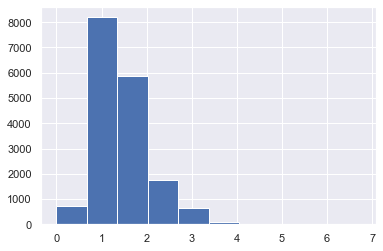

In [19]:
x1 = df1['bath_per_flr']
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(x1);

In [20]:
df1['bath_per_flr'].describe()

count    17290.000000
mean         1.504606
std          0.574267
min          0.000000
25%          1.000000
50%          1.250000
75%          1.750000
max          6.750000
Name: bath_per_flr, dtype: float64

### 4.1) Identify a categorical variable in the data set and create dummy columns.

* Categorical variables in the data set are grade, condition, 
* Other variable to possibly change to dummy --- sqft_basement, yr_renovated
1. condition
2. grade - grade as is, is highly correlated with price. will keep
3. sqft_basement -  only some house have sqfootage meaning only those houses have a basement. Dummy for have or not have a basement
4. yr_renovated - only some houses have renovation year, meaning only those houses have upgrades or renovation done. Dummy for have or not have renovation.

In [21]:
# dummy1 = df_train.drop('condition', axis = 1)
# dummy1_cat = df_train['condition']
# dummy1_cat.head()
df1['basement'] = df1['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
pd.set_option('display.max_columns', None)
df1.head()
df1['basement'].corr(df1['price'])

0.17697029253082677

In [22]:
df1['grade'].value_counts()

7     7183
8     4848
9     2099
6     1648
10     893
11     319
5      192
12      72
4       22
13      11
3        2
1        1
Name: grade, dtype: int64

In [23]:
df1['yr_renovated'].value_counts()

0       16564
2014       71
2007       32
2005       32
2000       31
        ...  
1934        1
1959        1
1944        1
1951        1
1948        1
Name: yr_renovated, Length: 69, dtype: int64

In [24]:
df1['renovated'] = df1['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
pd.set_option('display.max_columns', None)
df1.head()
df1['renovated'].corr(df1['price'])

0.11740867717359796

In [25]:
conditions = [
    df1['grade'] <= 4,
    df1['grade'] >= 10
]

choices = [
    'low_quality',
    'high_quality'
]
df1['design_grade'] = np.select(conditions, choices, default = 'ave_quality')

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_floor,outside_space,other_space,basement,renovated,design_grade
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0,ave_quality
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0,ave_quality
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0,high_quality
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0,high_quality
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0,ave_quality


In [26]:
dummy1 = pd.get_dummies(df1['design_grade'])
dummy1['price'] = df1['price']
dummy1['grade'] = df1['grade']
dummy1.corr()

,ave_quality,high_quality,low_quality,price,grade
ave_quality,1.000000,-0.989711,-0.132359,-0.549097,-0.637293
high_quality,-0.989711,1.000000,-0.010828,0.558886,0.660936
low_quality,-0.132359,-0.010828,1.000000,-0.034272,-0.124860
price,-0.549097,0.558886,-0.034272,1.000000,0.666215
grade,-0.637293,0.660936,-0.124860,0.666215,1.000000


In [27]:
dummy1.describe()

,ave_quality,high_quality,low_quality,price,grade
count,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000
mean,0.923655,0.074899,0.001446,5.407395e+05,7.654425
std,0.265557,0.263236,0.037999,3.733190e+05,1.174718
min,0.000000,0.000000,0.000000,7.500000e+04,1.000000
25%,1.000000,0.000000,0.000000,3.210000e+05,7.000000
50%,1.000000,0.000000,0.000000,4.500000e+05,7.000000
75%,1.000000,0.000000,0.000000,6.450000e+05,8.000000
max,1.000000,1.000000,1.000000,7.700000e+06,13.000000


In [28]:
df1['condition'].value_counts()

3    11244
4     4516
5     1367
2      139
1       24
Name: condition, dtype: int64

In [29]:
conditions = [
    df1['condition'] == 1,
    df1['grade'] >= 4
]

choices = [
    'low',
    'high'
]
df1['status'] = np.select(conditions, choices, default = 'ave')

df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_floor,outside_space,other_space,basement,renovated,design_grade,status
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700,12.807653,0.562500,1.125,0.001087,34,1.000000,1035.0,7858.0,0,0,0,ave_quality,high
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283,13.670485,0.600000,3.000,0.001034,43,1.584699,2900.0,3830.0,1070,1,0,ave_quality,high
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685,13.852806,0.625000,1.250,0.000663,23,1.000000,1885.0,9008.0,0,0,0,high_quality,high
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226,14.214287,1.166667,1.750,0.000768,30,1.000000,2280.0,12328.0,0,0,0,high_quality,high
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050,13.474428,0.833333,1.250,0.000980,16,1.000000,1275.0,4101.0,0,0,0,ave_quality,high


In [30]:
dummy2 = pd.get_dummies(df1['status'])
dummy2['price'] = df1['price']
dummy2['condition'] = df1['condition']
dummy2.corr()

,ave,high,low,price,condition
ave,1.000000,-0.277158,-0.000401,-0.010725,0.009769
high,-0.277158,1.000000,-0.960713,0.021628,0.129764
low,-0.000401,-0.960713,1.000000,-0.019412,-0.137877
price,-0.010725,0.021628,-0.019412,1.000000,0.036099
condition,0.009769,0.129764,-0.137877,0.036099,1.000000


In [73]:
df1['sale_quarter'] = df1['date2'].dt.quarter
df1['sale_month'] = df1['date2'].dt.month

In [85]:
df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_log',
       'bath_per_bed', 'bath_per_flr', 'bath_per_sqftliv', 'age', 'use_prop',
       'sqft_per_floor', 'outside_space', 'other_space', 'basement',
       'renovated', 'design_grade', 'status', 'date1', 'date2', 'sale_quarter',
       'sale_month'],
      dtype='object')

In [81]:
df1.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_log,bath_per_bed,bath_per_flr,bath_per_sqftliv,age,use_prop,sqft_per_floor,outside_space,other_space,basement,renovated,sale_quarter,sale_month
id,1.000000,-0.015644,-0.001529,0.003833,-0.014251,-0.129837,0.017126,0.000101,0.012594,-0.014272,0.003163,-0.013932,-0.003516,0.013697,-0.019560,-0.008166,-0.001865,0.017388,-0.007494,-0.139605,-0.002317,0.011634,-0.007723,0.019861,-0.013697,0.001378,-0.020387,-0.129788,-0.003516,0.003362,-0.019544,-0.014019,-0.014844
price,-0.015644,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.117770,-0.048958,0.302394,0.019327,0.585567,0.081423,0.886244,0.279777,0.240225,-0.265534,-0.056450,0.109311,0.433452,0.080252,0.323312,0.176970,0.117409,-0.002850,-0.004350
bedrooms,-0.001529,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.013679,-0.147515,-0.002170,0.124279,0.387589,0.026665,0.343370,-0.239351,0.339956,-0.233554,-0.153769,0.191480,0.420865,0.022901,0.300085,0.161442,0.013381,0.001916,0.002560
bathrooms,0.003833,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.048140,-0.201527,0.023074,0.221308,0.568080,0.086499,0.551547,0.652263,0.522368,0.195141,-0.507761,0.104061,0.365200,0.079977,0.282700,0.162507,0.047620,0.014141,0.012950
sqft_living,-0.014251,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.051448,-0.195893,0.052646,0.234453,0.755066,0.179570,0.696895,0.311344,0.376146,-0.432794,-0.319397,0.193068,0.649391,0.157071,0.435529,0.203606,0.051159,0.019027,0.017737
sqft_lot,-0.129837,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.004520,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.097651,0.063950,0.073639,-0.112147,-0.054228,-0.031602,0.140584,0.999882,0.008065,-0.038675,0.004608,-0.002698,-0.001722
floors,0.017126,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.005985,-0.060560,0.048227,0.128795,0.283933,-0.008170,0.312198,0.417335,-0.421347,0.157877,-0.483657,-0.359256,-0.392364,0.003882,-0.247481,-0.260333,0.005904,0.022392,0.019629
waterfront,0.000101,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.094268,0.034282,-0.013331,-0.042728,0.091090,0.026895,0.183123,0.087673,0.036312,-0.046862,0.021981,0.034611,0.084299,0.014079,0.083433,0.039484,0.094648,0.007942,0.005685
view,0.012594,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,0.091291,0.089475,0.003820,-0.077572,0.279999,0.073185,0.346461,0.134456,0.161553,-0.135784,0.049593,0.164842,0.261964,0.069142,0.279939,0.187475,0.091448,-0.004069,-0.004189
condition,-0.014272,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.060969,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,0.040469,-0.151547,0.133850,-0.079518,0.358921,0.192157,0.143088,-0.015965,0.166923,0.131918,-0.060471,0.013351,0.017099


### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

#your code here
could use to predict the age of the house

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [82]:
target = df1['price']
target_log = df1['price_log']

In [102]:
target.dtype

dtype('float64')

In [105]:
features = list(df1.columns)
features.remove('price')
features.remove('price_log')
features.remove('date')
features.remove('date1')
features.remove('status')
features.remove('design_grade')
features.remove('date2')
len(features)

31

In [114]:
df_features1 = df1[features]
df_features1.dtypes

id                    int64
bedrooms              int64
bathrooms           float64
sqft_living           int64
sqft_lot              int64
floors              float64
waterfront            int64
view                  int64
condition             int64
grade                 int64
sqft_above            int64
sqft_basement         int64
yr_built              int64
yr_renovated          int64
zipcode               int64
lat                 float64
long                float64
sqft_living15         int64
sqft_lot15            int64
bath_per_bed        float64
bath_per_flr        float64
bath_per_sqftliv    float64
age                   int64
use_prop            float64
sqft_per_floor      float64
outside_space       float64
other_space           int64
basement              int64
renovated             int64
sale_quarter          int64
sale_month            int64
dtype: object

In [124]:
df_features1.isna().any()

id                  False
bedrooms            False
bathrooms           False
sqft_living         False
sqft_lot            False
floors              False
waterfront          False
view                False
condition           False
grade               False
sqft_above          False
sqft_basement       False
yr_built            False
yr_renovated        False
zipcode             False
lat                 False
long                False
sqft_living15       False
sqft_lot15          False
bath_per_bed         True
bath_per_flr        False
bath_per_sqftliv    False
age                 False
use_prop            False
sqft_per_floor      False
outside_space       False
other_space         False
basement            False
renovated           False
sale_quarter        False
sale_month          False
dtype: bool

A baseline model is a model with NO predictors. In regression essentially it is the mean ( or median) of the y-variable. We can create a baseline model in sklearn using the DummyRegressor object.

In [116]:
# Baseline model
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor()  # by default this will use the mean

baseline.fit(X_train, y_train)
#Note: No summary table like in statsmodel
# Note: will be missing the p-vals and the different statistics 
#since sklearn is focused on the predictability of the model

baseline.score(X_train, y_train) 
# the score of a regression model is the r-squared value
# r-squared - How much of the outcome is explained by the features

0.0

In [117]:
y_pred_bs = baseline.predict(X_train) 

In [118]:
y_pred_bs

array([541205.12716888, 541205.12716888, 541205.12716888, ...,
       541205.12716888, 541205.12716888, 541205.12716888])

In [119]:
from sklearn.metrics import mean_squared_error
baseline_rmse = mean_squared_error(y_train, y_pred_bs, squared=False)
# MSE if squared is True
# error here is due to sklearn version....pip install -U scikit-learn
baseline_rmse

372113.0076026236

In [120]:
#your code here 
## import the function
from sklearn.model_selection import train_test_split

In [121]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_features1, target, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train1.shape, "Target: ", y_train1.shape,)
print("Test set - Features: ", X_test1.shape, "Target: ",y_test1.shape,)


Training set - Features:  (13832, 31) Target:  (13832,)
Test set - Features:  (3458, 31) Target:  (3458,)


### 5.2) Fit your scaler to training the data.

In [ ]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [ ]:
#your code here 

### 5.4) Fit the model to the training data.

In [122]:
#your code here 
# fit a model
from sklearn import linear_model

#instantiate a linear regression object
model1 = linear_model.LinearRegression()

#fit the linear regression to the data
model1.fit(X_train1, y_train1)


print(lm.intercept_)
print(lm.coef_)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 5.5) Use the model to predict on the training set and the test set.

In [ ]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [ ]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [ ]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [ ]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/